# *MÉTODO DEL TRAPECIO*

## A) DEMOSTRACIÓN GEOMÉTRICA.

### Para una Linea Recta.

![Trap_1](https://user-images.githubusercontent.com/47722525/78745810-da85a380-792a-11ea-8857-99a85a408f4d.png)

![Trap_2](https://user-images.githubusercontent.com/47722525/78745839-f12bfa80-792a-11ea-9bfe-ecc84c247d6a.png)

### Regla del Trapecio de Aplicación Multiple

![Trap_3](https://user-images.githubusercontent.com/47722525/78745887-0ef95f80-792b-11ea-9cad-0ca3e8cf1cdb.png)

## B) FÓRMULA MATEMÁTICA.

![FormTrap1](https://user-images.githubusercontent.com/47722525/78745920-2d5f5b00-792b-11ea-858f-3bf40df1945c.png)

## C) DIAGRAMA DE FLUJO DEL MÉTODO DEL TRAPECIO.

![DiagF](https://user-images.githubusercontent.com/47722525/78745962-4536df00-792b-11ea-884c-a6daec467fb5.png)

## D) PROGRAMACIÓN DEL MÉTODO DEL TRAPECIO.

In [2]:
# Librerias
import math
import numpy as np
import matplotlib.pyplot as plt

# Función
def Integral_Trapesio(V_fx, a, b, n):
    '''
    (V_fx, a, b, n) -> Area bajo la curva
    
    Devuelve el area bajo una curva (en intervalos iguales).

    Inputs:
    a = Inicio del intervalo.
    b = Final del intervalo.
    n = Número de diviciones en el intervalo.
    V_fx = vector f(x) = 0 de la funcion a integrar.
    
    Output:
    Area bajo la curva
    
    Programó:
    Ing. Josue Emmanuel Cruz Barragan
    '''
    V_S_2fxi = [2*fxi for fxi in V_fx if fxi!=V_fx[-1] if fxi!=V_fx[0]]
    S_2fxi = sum(V_S_2fxi)
    fa = V_fx[0]
    fb = V_fx[-1]

    return (b-a)*(fa + S_2fxi + fb)/(2*n)

## E) APLICACIÓN DEL MÉTODO DEL TRAPECIO A LA HIDRÁULICA.

### EJEMPLO 1.- ÁREA Y CAUDAL DE UN RÍO.

### _Se recolectaron los siguientes datos para una sección transversal de un río (y = distancia de una rivera, H = profundidad y U = velocidad):_

| y,mts. |  H,mts.| U,m/s. |
| ------ |--------| ------:|
|    0   |   0.0  |   0.0  |
|    2   |   1.8  |   0.10 |
|    4   |   2.0  |   0.12 |
|    6   |   4.0  |   0.20 |
|    8   |   4.0  |   0.25 |
|   10   |   6.0  |   0.35 |
|   12   |   4.0  |   0.30 |
|   14   |   3.6  |   0.20 |
|   16   |   3.4  |   0.15 |
|   18   |   2.8  |   0.13 |
|   20   |   0.0  |   0.0  |

### _Use integración numérica para calcular: a) la profundidad promedio, b) el área de la sección transversal, c) la velocidad promedio y d) el caudal. Observe que el área transversal (A) y el caudal (Q) se pueden calcular como:_

![E1](https://user-images.githubusercontent.com/47722525/78746093-9646d300-792b-11ea-80a0-6d10b12acc14.png)

### SOLUCIÓN.

### a) Datos:

In [3]:
y = [0,2,4,6,8,10,12,14,16,18,20]                     # Distancia de una rivera, metros.
H = [0,1.8,2,4,4,6,4,3.6,3.4,2.8,0]                   # Profundidad, metros.
U = [0,0.1,0.12,0.20,0.25,0.35,0.30,0.20,0.15,0.13,0] # Velocidad, m/s.

### b) Gráfica de la sección transversal del Río:

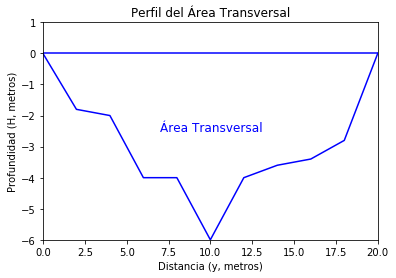

In [4]:
Prof = [[-1*h,0] for h in H ]
plt.plot(y,Prof,color='blue')
plt.title('Perfil del Área Transversal')
plt.xlabel('Distancia (y, metros)')
plt.ylabel('Profundidad (H, metros)')
plt.text(7, -2.5, 'Área Transversal', fontsize=12,color='blue')
plt.axis([0, 20,-6,1])
plt.show()

### c) Resultados:

#### Profundidad promedio

In [5]:
Hprom = round(sum(H)/len(H),2)
print('La profundidad promedio es de:',Hprom,'metros')

La profundidad promedio es de: 2.87 metros


#### Area de la sección transversal

In [6]:
n = len(y)-1
a = y[0]
b = y[-1]
V_fx = H
At = round(Integral_Trapesio(V_fx, a, b, n),2)
print('El área transversal del río es: ',At,'m2')

El área transversal del río es:  63.2 m2


#### Velocidad promedio

In [7]:
Vprom = sum(U)/len(U)
print('La velocidad promedio es de:',round(Vprom,2),'m/s')

La velocidad promedio es de: 0.16 m/s


#### Caudal

In [8]:
n = len(y)-1
a = y[0]
b = y[-1]
V_fx = [H[q]*U[q] for q in range(len(H))]
Q = round(Integral_Trapesio(V_fx, a, b, n),2)
print('El caudal del río es: ',Q,'m3/s')

El caudal del río es:  14.23 m3/s


### EJEMPLO 2.- CANTIDAD DE MASA TRANSPORTADA.

### _La cantidad de masa transportada por un tubo en un periodo dado se puede calcular como:_

![masa](https://user-images.githubusercontent.com/47722525/78746345-24bb5480-792c-11ea-89bc-2c6fcc98b3dc.png)

### _donde M = masa (mg), t1 = tiempo inicial en (min), t2 = tiempo final en (min), Q(t) = caudal (m3/s) y c(t) = concentración (mg/m3). Las siguientes representaciones funcionales definen las variaciones temporales en flujo y concentración:_

![Qc](https://user-images.githubusercontent.com/47722525/78746406-64823c00-792c-11ea-9f75-b2a33a91cb12.png)

### _Determine la masa transportada entre t1 = 2 y t2 = 8 min._

### SOLUCIÓN.

### a) Datos:

In [10]:
a = 2 # t1, minutos
b = 8 # t2, minutos
n = 101 # intervalos

#### Discretizamos el tiempo y gráficamos Q(t)c(t)

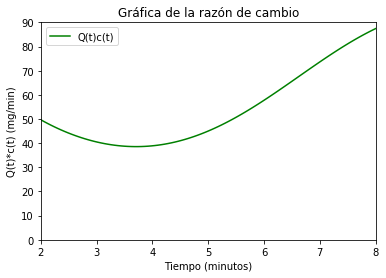

In [11]:
# Discretizamos el tiempo en 100 intervalos (n-1):
t = np.linspace(a, b, n)

# Creamos las funciones del caudal y de la concentración:
Qt = lambda t: 9 + 4*(math.cos(0.4*t))**2
ct = lambda t: 5*math.exp(-0.5*t) + 2*math.exp(0.15*t)

# Con el timepo discretizado multiplicamos Q(t) por c(t) para graficar la razon de cambio:
Qtct = [Qt(t[i])*ct(t[i]) for i in range(len(t))]

plt.plot(t,Qtct,color='green',label='Q(t)c(t)')
plt.title('Gráfica de la razón de cambio')
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Q(t)*c(t) (mg/min)')
plt.axis([2, 8,0,90])
plt.legend();
plt.show()

### b) Resultados:

In [13]:
V_fx = Qtct
M = round(Integral_Trapesio(V_fx, a, b, n),2)
print('La cantidad de masa transportada es',M,'mg')

La cantidad de masa transportada es 319.16 mg
